In [1]:
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v

print(rgb_to_hsv(253, 254, 230))
print(rgb_to_hsv(10, 0, 0))

(62.49999999999999, 9.448818897637794, 99.6078431372549)
(0.0, 100.0, 3.9215686274509802)


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


In [3]:
dataset = pd.read_csv('E:/PyETL/vgg16_test/done/big_table/all_shoe_less.csv')
dataset = dataset.sort_values(['商品型號'], ascending=[True])
x1 = dataset.iloc[:,3].values
x1
x2 = dataset.iloc[:,6].values
# x3 = dataset.iloc[:,9].values
# pa1 = dataset.iloc[:,4].values
# pa2 = dataset.iloc[:,7].values
# pa3 = dataset.iloc[:,10].values
# dataset.iloc[:,10].values

In [4]:
# 處理 主要顏色欄位



#################     主要顏色         ######################

rgb_mcolor_list = []
for hex_color1 in x1:
    # 轉10進制
    rgb_mcolor_list.append(list(int(hex_color1[i:i+2], 16) for i in (1, 3, 5)))
rgb_mcolor_list
rgb_mcolor1 = []
rgb_mcolor2 = []
rgb_mcolor3 = []

## 抓RGB的R顏色
for i in range(len(rgb_mcolor_list)):
    rgb_mcolor1.append(rgb_mcolor_list[i][0])
rgb_mcolor1

## 抓RGB的G顏色
for i in range(len(rgb_mcolor_list)):
    rgb_mcolor2.append(rgb_mcolor_list[i][1])
rgb_mcolor2

## 抓RGB的B顏色
for i in range(len(rgb_mcolor_list)):
    rgb_mcolor3.append(rgb_mcolor_list[i][2])
rgb_mcolor3


# #################     次要顏色         ######################

rgb_scolor_list = []
for hex_color2 in x2:
    # 轉10進制
    rgb_scolor_list.append(list(int(hex_color2[i:i+2], 16) for i in (1, 3, 5)))
rgb_scolor_list
rgb_scolor1 = []
rgb_scolor2 = []
rgb_scolor3 = []

## 抓RGB的R顏色
for i in range(len(rgb_scolor_list)):
    rgb_scolor1.append(rgb_scolor_list[i][0]/255)
rgb_scolor1

## 抓RGB的G顏色
for i in range(len(rgb_scolor_list)):
    rgb_scolor2.append(rgb_scolor_list[i][1]/255)
rgb_scolor2

## 抓RGB的B顏色
for i in range(len(rgb_scolor_list)):
    rgb_scolor3.append(rgb_scolor_list[i][2]/255)
rgb_scolor3



# #################     其他顏色         ######################

# rgb_elcolor_list = []
# for hex_color3 in x3:
#     # 轉10進制
#     rgb_elcolor_list.append(list(int(hex_color3[i:i+2], 16) for i in (1, 3, 5)))
# rgb_elcolor_list
# rgb_elcolor1 = []
# rgb_elcolor2 = []
# rgb_elcolor3 = []

# ## 抓RGB的R顏色
# for i in range(len(rgb_elcolor_list)):
#     rgb_elcolor1.append(rgb_elcolor_list[i][0]/255)
# rgb_elcolor1

# ## 抓RGB的G顏色
# for i in range(len(rgb_elcolor_list)):
#     rgb_elcolor2.append(rgb_elcolor_list[i][1]/255)
# rgb_elcolor2

# ## 抓RGB的B顏色
# for i in range(len(rgb_elcolor_list)):
#     rgb_elcolor3.append(rgb_elcolor_list[i][2]/255)
# rgb_elcolor3



[0.9254901960784314,
 0.9254901960784314,
 0.9215686274509803,
 0.9137254901960784,
 0.26666666666666666,
 0.8627450980392157,
 0.26666666666666666,
 0.984313725490196,
 0.4235294117647059,
 0.3254901960784314,
 0.9254901960784314,
 0.28627450980392155,
 0.7490196078431373,
 0.27450980392156865,
 0.23921568627450981,
 0.5450980392156862,
 0.8941176470588236,
 0.807843137254902,
 0.8549019607843137,
 0.21568627450980393,
 0.23529411764705882,
 0.17254901960784313,
 0.34901960784313724,
 0.21568627450980393,
 0.36470588235294116,
 0.5058823529411764,
 0.3764705882352941,
 0.9294117647058824,
 0.0784313725490196,
 0.28627450980392155,
 0.3764705882352941,
 0.5215686274509804,
 0.403921568627451,
 0.3764705882352941,
 0.17254901960784313,
 0.17254901960784313,
 0.23921568627450981,
 0.0784313725490196,
 0.9019607843137255,
 0.5450980392156862,
 0.9019607843137255,
 0.9294117647058824,
 0.9019607843137255,
 0.16470588235294117,
 0.5450980392156862,
 0.3137254901960784,
 0.8823529411764706,


In [5]:
import math

##############   主要顏色轉換   #######################
hsv_mcolor1 = []
hsv_mcolor2 = []
hsv_mcolor3 = []

for i in range(len(rgb_mcolor_list)):
    mh, ms, mv = rgb_to_hsv(rgb_mcolor_list[i][0], rgb_mcolor_list[i][1], rgb_mcolor_list[i][2])
    mh = math.cos(mh*math.pi/180)
    mh = (mh+1)/2
    ms = ms/100
    mv = mv / 100
    hsv_mcolor1.append(mh)
    hsv_mcolor2.append(ms)
    hsv_mcolor3.append(mv)
hsv_mcolor1






hsv_scolor1 = []
hsv_scolor2 = []
hsv_scolor3 = []

for i in range(len(rgb_scolor_list)):
    sh, ss, sv = rgb_to_hsv(rgb_scolor_list[i][0], rgb_scolor_list[i][1], rgb_scolor_list[i][2])
    sh = math.cos(sh*math.pi/180)
    sh = (sh+1)/2
    ss = ss/100
    sv = sv / 100
    hsv_scolor1.append(sh)
    hsv_scolor2.append(ss)
    hsv_scolor3.append(sv)
hsv_scolor1









# hsv_elcolor1 = []
# hsv_elcolor2 = []
# hsv_elcolor3 = []

# for i in range(len(rgb_elcolor_list)):
#     elh, els, elv = rgb_to_hsv(rgb_elcolor_list[i][0], rgb_elcolor_list[i][1], rgb_elcolor_list[i][2])
#     elh = math.cos(elh*math.pi/180)
#     elh = (elh+1)/2
#     els = els/100
#     elv = elv / 100
#     hsv_elcolor1.append(elh)
#     hsv_elcolor2.append(els)
#     hsv_elcolor3.append(elv)
# hsv_elcolor1

[0.24999999999999978,
 0.24999999999999978,
 0.24999999999999978,
 0.24999999999999978,
 0.9900862439242719,
 0.8213938048432696,
 0.5868240888334654,
 1.0,
 0.9302007896300696,
 0.8830222215594883,
 0.03015368960704684,
 0.9999874838141887,
 0.11697777844051138,
 0.14644660940672666,
 0.1410440384677792,
 0.011737102653202769,
 0.9045084971874731,
 0.883022221559489,
 0.116977778440511,
 0.14644660940672666,
 0.75,
 0.15016832974331734,
 0.19027581939213856,
 0.14644660940672666,
 0.7017175809949043,
 1.0,
 0.9977359612865423,
 0.0,
 0.883022221559489,
 0.75,
 0.2591231629491425,
 0.043227271178699456,
 1.0,
 1.0,
 0.9504844339512095,
 0.9504844339512095,
 0.9698463103929544,
 1.0,
 1.0,
 0.853553390593276,
 1.0,
 0.75,
 1.0,
 0.06698729810778026,
 0.853553390593276,
 0.09736487123447063,
 0.4131759111665362,
 0.0022640387134577056,
 0.75,
 0.9330127018922187,
 0.1492625561468393,
 0.75,
 0.26476725969862236,
 0.24999999999999978,
 0.03299194563372598,
 0.13347406408508583,
 0.9504844

In [6]:
dataset.insert(2, "MV", hsv_mcolor3)
dataset.insert(2, "MS", hsv_mcolor2)
dataset.insert(2, "MH", hsv_mcolor1)

dataset.insert(2, "SV", hsv_scolor3)
dataset.insert(2, "SS", hsv_scolor2)
dataset.insert(2, "SH", hsv_scolor1)

# dataset.insert(2, "ELV", hsv_elcolor3)
# dataset.insert(2, "ELS", hsv_elcolor2)
# dataset.insert(2, "ELH", hsv_elcolor1)

dataset

,商品型號,商品網址,SH,SS,SV,MH,MS,MV,主要顏色名稱,主要顏色編號,...,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,0.250000,0.004237,0.925490,0.933013,0.035088,0.223529,DarkSlateGray,#393837,...,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,A,160.0,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,0.250000,0.004237,0.925490,0.750000,0.011905,0.329412,DimGray,#545354,...,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,A,150.0,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,0.250000,0.008511,0.921569,0.750000,0.023256,0.168627,Black,#2b2b2a,...,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95.0,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,0.250000,0.004292,0.913725,1.000000,0.000000,0.149020,Black,#262626,...,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95.0,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,0.990086,0.235955,0.349020,0.750000,0.032258,0.121569,Black,#1f1e1f,...,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,A,70.0,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,WZANPWV,https://www.newbalance.com/pd/fresh-foam-zante...,0.250000,0.070000,0.392157,0.413176,0.014151,0.831373,LightGray,#d2d1d4,...,0.260,DarkSlateBlue,#4f2548,0.025,https://nb.scene7.com/is/image/NB/wzanpwv_nb_0...,Fresh Foam Zante Pursuit,new balance,W,109.99,We packed our New Balance Fresh Foam Zante Pur...
9202,WZANSBB,https://www.newbalance.com/pd/fresh-foam-zante...,0.250000,0.006329,0.619608,0.750000,0.035088,0.223529,DarkSlateGray,#393937,...,0.302,Gainsboro,#e0e0e3,0.155,https://nb.scene7.com/is/image/NB/wzansbb_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9203,WZANSCS,https://www.newbalance.com/pd/fresh-foam-zante...,0.969846,0.012295,0.956863,0.956773,0.075188,0.521569,Gray,#857b7f,...,0.456,Gray,#857b7f,0.544,https://nb.scene7.com/is/image/NB/wzanscs_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9204,WZANSLN,https://www.newbalance.com/pd/fresh-foam-zante...,0.082256,0.042254,0.835294,0.250000,0.200000,0.176471,Black,#24242d,...,0.281,DarkSlateGray,#2d5552,0.128,https://nb.scene7.com/is/image/NB/wzansln_nb_0...,Fresh Foam Zante Solas London Collection,new balance,W,99.99,Celebrate the Virgin Money London Marathon wit...


# 熱度圖

In [7]:
d = dataset[["MH", 'MS', "MV", "SH", "SS", 'SV', "主要顏色占比", "次要顏色占比"]]
d

,MH,MS,MV,SH,SS,SV,主要顏色占比,次要顏色占比
0,0.933013,0.035088,0.223529,0.250000,0.004237,0.925490,0.599,0.217
1,0.750000,0.011905,0.329412,0.250000,0.004237,0.925490,0.642,0.245
2,0.750000,0.023256,0.168627,0.250000,0.008511,0.921569,0.631,0.248
3,1.000000,0.000000,0.149020,0.250000,0.004292,0.913725,0.552,0.280
4,0.750000,0.032258,0.121569,0.990086,0.235955,0.349020,0.412,0.299
...,...,...,...,...,...,...,...,...
9201,0.413176,0.014151,0.831373,0.250000,0.070000,0.392157,0.704,0.260
9202,0.750000,0.035088,0.223529,0.250000,0.006329,0.619608,0.543,0.302
9203,0.956773,0.075188,0.521569,0.969846,0.012295,0.956863,0.544,0.456
9204,0.250000,0.200000,0.176471,0.082256,0.042254,0.835294,0.428,0.281


e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\li

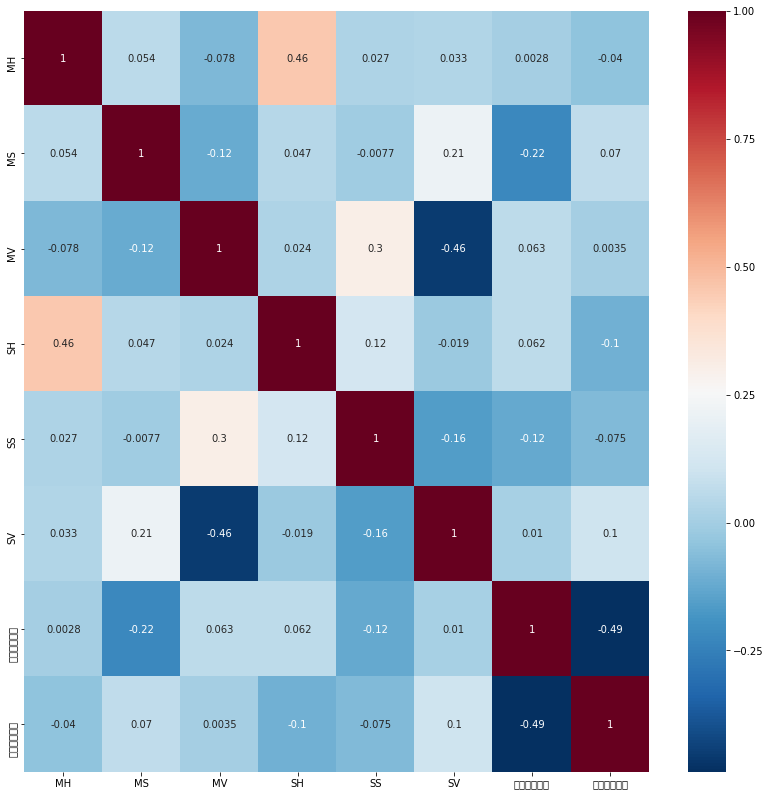

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
plt.figure(figsize=(14, 14))
sns.heatmap(d.corr(),
           annot=True,
           cmap="RdBu_r")

In [11]:
sx = dataset.iloc[:, [2, 3, 4]].values
# x = dataset.iloc[:, [2, 3, 4, 5, 6, 7]].values
mx = dataset.iloc[:, [5, 6, 7]].values
# x = dataset.iloc[:, [2, 3, 4, 7]].values
dataset


,商品型號,商品網址,SH,SS,SV,MH,MS,MV,主要顏色名稱,主要顏色編號,...,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,0.250000,0.004237,0.925490,0.933013,0.035088,0.223529,DarkSlateGray,#393837,...,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,A,160.0,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,0.250000,0.004237,0.925490,0.750000,0.011905,0.329412,DimGray,#545354,...,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,A,150.0,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,0.250000,0.008511,0.921569,0.750000,0.023256,0.168627,Black,#2b2b2a,...,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95.0,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,0.250000,0.004292,0.913725,1.000000,0.000000,0.149020,Black,#262626,...,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95.0,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,0.990086,0.235955,0.349020,0.750000,0.032258,0.121569,Black,#1f1e1f,...,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,A,70.0,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,WZANPWV,https://www.newbalance.com/pd/fresh-foam-zante...,0.250000,0.070000,0.392157,0.413176,0.014151,0.831373,LightGray,#d2d1d4,...,0.260,DarkSlateBlue,#4f2548,0.025,https://nb.scene7.com/is/image/NB/wzanpwv_nb_0...,Fresh Foam Zante Pursuit,new balance,W,109.99,We packed our New Balance Fresh Foam Zante Pur...
9202,WZANSBB,https://www.newbalance.com/pd/fresh-foam-zante...,0.250000,0.006329,0.619608,0.750000,0.035088,0.223529,DarkSlateGray,#393937,...,0.302,Gainsboro,#e0e0e3,0.155,https://nb.scene7.com/is/image/NB/wzansbb_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9203,WZANSCS,https://www.newbalance.com/pd/fresh-foam-zante...,0.969846,0.012295,0.956863,0.956773,0.075188,0.521569,Gray,#857b7f,...,0.456,Gray,#857b7f,0.544,https://nb.scene7.com/is/image/NB/wzanscs_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9204,WZANSLN,https://www.newbalance.com/pd/fresh-foam-zante...,0.082256,0.042254,0.835294,0.250000,0.200000,0.176471,Black,#24242d,...,0.281,DarkSlateGray,#2d5552,0.128,https://nb.scene7.com/is/image/NB/wzansln_nb_0...,Fresh Foam Zante Solas London Collection,new balance,W,99.99,Celebrate the Virgin Money London Marathon wit...


In [ ]:
# wcss = []
# for i in range(2, 30):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(x)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(2, 30), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=15, init='k-means++', max_iter=300, n_init=10, random_state=0)
# pred_y = kmeans.fit_predict(x)
# plt.scatter(x[:,0], x[:,1])
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
# plt.show()

# 主要顏色分群分數 (4群)

In [ ]:
from sklearn.cluster import KMeans
# cluster = KMeans(n_clusters=15)

from sklearn.metrics import silhouette_score
x1 = []
y1 = []
for k in range(2, 20):
    cluster = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster.fit(mx)
    s = silhouette_score(mx, cluster.labels_)
    x1.append(k)
    y1.append(s)
print("K choice:", x1)
print("Score:", y1)

# 主要顏色最佳分數 6群

In [ ]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(mx)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 次要顏色分群 (4群)

In [ ]:
from sklearn.cluster import KMeans
# cluster = KMeans(n_clusters=15)

from sklearn.metrics import silhouette_score
x1 = []
y1 = []
for k in range(2, 15):
    cluster = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster.fit(sx)
    s = silhouette_score(sx, cluster.labels_)
    x1.append(k)
    y1.append(s)
print("K choice:", x1)
print("Score:", y1)

# 次要顏色最佳分數 6群

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(mx)
plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(mx)
labels = kmeans.predict(mx)

kmeans.cluster_centers_

In [12]:
def hsv2rgb(h, s, v):
    
    h = float(h)
    s = float(s)
    v = float(v)
    h60 = h / 60.0
    h60f = math.floor(h60)
    hi = int(h60f) % 6
    f = h60 - h60f
    p = v * (1 - s)
    q = v * (1 - f * s)
    t = v * (1 - (1 - f) * s)
    r, g, b = 0, 0, 0
    if hi == 0: r, g, b = v, t, p
    elif hi == 1: r, g, b = q, v, p
    elif hi == 2: r, g, b = p, v, t
    elif hi == 3: r, g, b = p, q, v
    elif hi == 4: r, g, b = t, p, v
    elif hi == 5: r, g, b = v, p, q
    r, g, b = int(r * 255), int(g * 255), int(b * 255)
    return r, g, b

In [ ]:
h,s,v =0.88409855, 0.05600601, 0.81415977
h = math.acos( h*2 - 1) * 180 / math.pi

hsv2rgb(h, s, v)

# h,s,v = rgb_to_hsv(r, g, b)

# 主要顏色HSV 3D圖

<IPython.core.display.Javascript object>


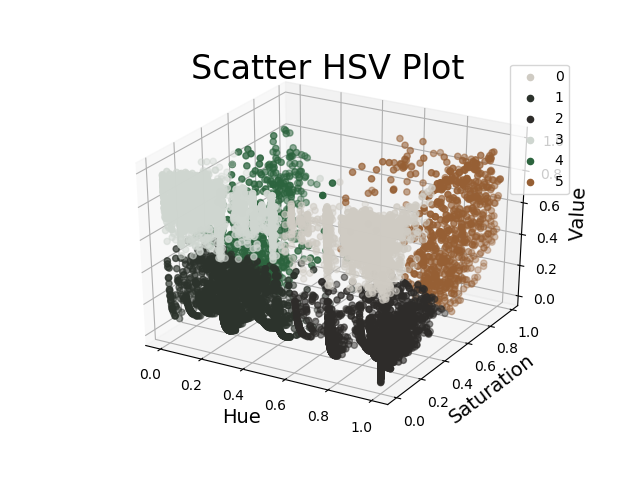

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [13]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(mx)
labels = kmeans.predict(mx)


fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 設定標題
ax.set_title('Scatter HSV Plot', fontsize=24) 
# 設定三軸名稱
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)



ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 
cluster_centers_col = []

for i in range(len(set(labels))): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(mx)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(hsv_mcolor1[k])
            yL.append(hsv_mcolor2[k])
            zL.append(hsv_mcolor3[k])
    
    h = kmeans.cluster_centers_[i][0]
    s = kmeans.cluster_centers_[i][1]
    v = kmeans.cluster_centers_[i][2]
    
    h = math.acos( h*2 - 1) * 180 / math.pi
    r,g,b = hsv2rgb(h, s, v)
#     col = np.array(list(r,g,b))
    
    
    kmeans.cluster_centers_[i][0] = r/255
    kmeans.cluster_centers_[i][1] = g/255
    kmeans.cluster_centers_[i][2] = b/255
    
#     ax.scatter(xL,yL,zL,c=ColorsA[i], label=i)
    ax.scatter(xL,yL,zL,c=kmeans.cluster_centers_[i], label=i)
#     ax.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],kmeans.cluster_centers_[i][2],c=ColorsA[len(set(labels))-i-1])
    
ax.legend()

<IPython.core.display.Javascript object>


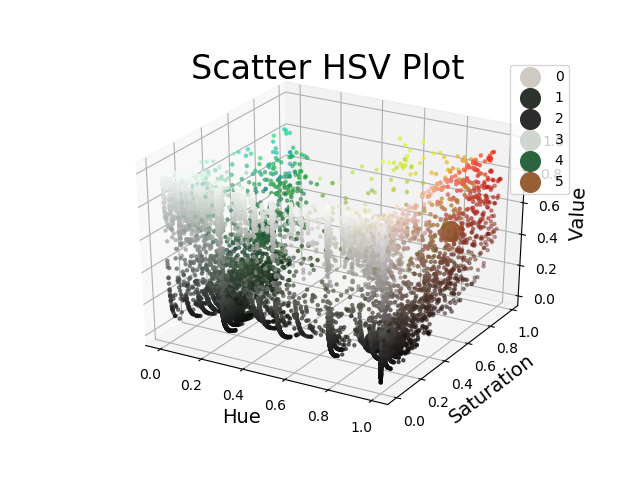

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [14]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(mx)
labels = kmeans.predict(mx)


fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 設定標題
ax.set_title('Scatter HSV Plot', fontsize=24) 
# 設定三軸名稱
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)



# ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 

for i in range(len(set(labels))): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    one = []
    for k in range(len(mx)):
        if labels[k]==i: #Data points of each cluster 
            h1 = hsv_mcolor1[k]
            s = hsv_mcolor2[k]
            v = hsv_mcolor3[k]
            
            h = math.acos( h1*2 - 1) * 180 / math.pi
            r,g,b = hsv2rgb(h, s, v)
            
            xL.append(h1)
            yL.append(s)
            zL.append(v)
            one.append([r/255,g/255,b/255])
    one = np.array(one)
    cluster_centers_col = []
    ax.scatter(xL, yL ,zL ,c=one, s=5)
            
    ch = kmeans.cluster_centers_[i][0]
    cs = kmeans.cluster_centers_[i][1]
    cv = kmeans.cluster_centers_[i][2]
    
    
    ch = math.acos( ch*2 - 1) * 180 / math.pi
    r, g, b = hsv2rgb(ch, cs, cv)
    
#     col = np.array(list(r,g,b))
    center_color = [r/255, g/255, b/255]
    center_color = np.array(center_color)
    
#     kmeans.cluster_centers_[i][0] = r/255
#     kmeans.cluster_centers_[i][1] = g/255
#     kmeans.cluster_centers_[i][2] = b/255
    
#     ax.scatter(xL,yL,zL,c=ColorsA[i], label=i)
    ax.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], kmeans.cluster_centers_[i][2],c=center_color, label=i, s=200)
#     ax.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],kmeans.cluster_centers_[i][2],c=ColorsA[len(set(labels))-i-1])
    
ax.legend()

In [15]:
dataset.insert(2, "主色標籤", labels, True)


dataset.iloc[:,2].loc[list(dataset['主色標籤'] == 3)] = 0

dataset.iloc[:,2].loc[list(dataset['主色標籤'] == 2)] = 1

dataset.iloc[:,2].loc[list(dataset['主色標籤'] == 4)] = 2

dataset.iloc[:,2].loc[list(dataset['主色標籤'] == 5)] = 3


set(list(dataset['主色標籤']))
    
# set(dataset['主色標籤'] == 0)
# dataset.loc[:,2] == 3
# dataset["主色標籤"].iloc.[dataset.loc[list(dataset['主色標籤'] == 3)]] = 0


e:\pyetl\venv\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


{0, 1, 2, 3}

# 次要顏色HSV 3D圖

<IPython.core.display.Javascript object>


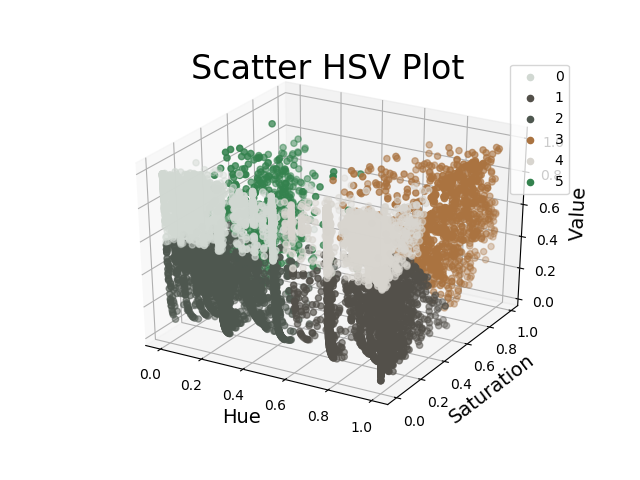

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [16]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(sx)
labels = kmeans.predict(sx)


fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 設定標題
ax.set_title('Scatter HSV Plot', fontsize=24) 
# 設定三軸名稱
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)



ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 
cluster_centers_col = []

for i in range(len(set(labels))): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(sx)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(hsv_scolor1[k])
            yL.append(hsv_scolor2[k])
            zL.append(hsv_scolor3[k])
    
    h = kmeans.cluster_centers_[i][0]
    s = kmeans.cluster_centers_[i][1]
    v = kmeans.cluster_centers_[i][2]
    
    h = math.acos( h*2 - 1) * 180 / math.pi
    r,g,b = hsv2rgb(h, s, v)
#     col = np.array(list(r,g,b))
    
    
    kmeans.cluster_centers_[i][0] = r/255
    kmeans.cluster_centers_[i][1] = g/255
    kmeans.cluster_centers_[i][2] = b/255
    
#     ax.scatter(xL,yL,zL,c=ColorsA[i], label=i)
    ax.scatter(xL,yL,zL,c=kmeans.cluster_centers_[i], label=i)
#     ax.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],kmeans.cluster_centers_[i][2],c=ColorsA[len(set(labels))-i-1])
    
ax.legend()

<IPython.core.display.Javascript object>


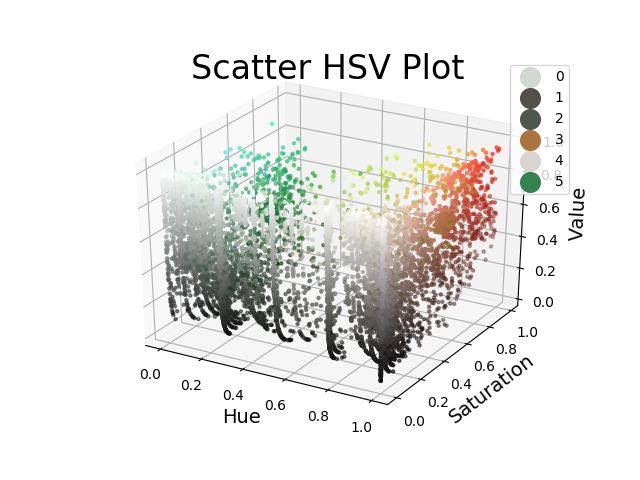

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [17]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(sx)
labels = kmeans.predict(sx)


fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 設定標題
ax.set_title('Scatter HSV Plot', fontsize=24) 
# 設定三軸名稱
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)



# ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 

for i in range(len(set(labels))): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    one = []
    for k in range(len(sx)):
        if labels[k]==i: #Data points of each cluster 
            h1 = hsv_scolor1[k]
            s = hsv_scolor2[k]
            v = hsv_scolor3[k]
            
            h = math.acos( h1*2 - 1) * 180 / math.pi
            r,g,b = hsv2rgb(h, s, v)
            
            xL.append(h1)
            yL.append(s)
            zL.append(v)
            one.append([r/255,g/255,b/255])
    one = np.array(one)
    cluster_centers_col = []
    ax.scatter(xL, yL ,zL ,c=one, s=5)
            
    ch = kmeans.cluster_centers_[i][0]
    cs = kmeans.cluster_centers_[i][1]
    cv = kmeans.cluster_centers_[i][2]
    
    
    ch = math.acos( ch*2 - 1) * 180 / math.pi
    r, g, b = hsv2rgb(ch, cs, cv)
    
#     col = np.array(list(r,g,b))
    center_color = [r/255, g/255, b/255]
    center_color = np.array(center_color)
    
#     kmeans.cluster_centers_[i][0] = r/255
#     kmeans.cluster_centers_[i][1] = g/255
#     kmeans.cluster_centers_[i][2] = b/255
    
#     ax.scatter(xL,yL,zL,c=ColorsA[i], label=i)
    ax.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], kmeans.cluster_centers_[i][2],c=center_color, label=i, s=200)
#     ax.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],kmeans.cluster_centers_[i][2],c=ColorsA[len(set(labels))-i-1])
    
ax.legend()

In [18]:
dataset.insert(2, "次色標籤", labels, True)
dataset

,商品型號,商品網址,次色標籤,主色標籤,SH,SS,SV,MH,MS,MV,...,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,0,1,0.250000,0.004237,0.925490,0.933013,0.035088,0.223529,...,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,A,160.0,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,0,1,0.250000,0.004237,0.925490,0.750000,0.011905,0.329412,...,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,A,150.0,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,0,1,0.250000,0.008511,0.921569,0.750000,0.023256,0.168627,...,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95.0,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,0,1,0.250000,0.004292,0.913725,1.000000,0.000000,0.149020,...,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95.0,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,1,1,0.990086,0.235955,0.349020,0.750000,0.032258,0.121569,...,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,A,70.0,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,WZANPWV,https://www.newbalance.com/pd/fresh-foam-zante...,2,0,0.250000,0.070000,0.392157,0.413176,0.014151,0.831373,...,0.260,DarkSlateBlue,#4f2548,0.025,https://nb.scene7.com/is/image/NB/wzanpwv_nb_0...,Fresh Foam Zante Pursuit,new balance,W,109.99,We packed our New Balance Fresh Foam Zante Pur...
9202,WZANSBB,https://www.newbalance.com/pd/fresh-foam-zante...,0,1,0.250000,0.006329,0.619608,0.750000,0.035088,0.223529,...,0.302,Gainsboro,#e0e0e3,0.155,https://nb.scene7.com/is/image/NB/wzansbb_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9203,WZANSCS,https://www.newbalance.com/pd/fresh-foam-zante...,4,0,0.969846,0.012295,0.956863,0.956773,0.075188,0.521569,...,0.456,Gray,#857b7f,0.544,https://nb.scene7.com/is/image/NB/wzanscs_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9204,WZANSLN,https://www.newbalance.com/pd/fresh-foam-zante...,0,1,0.082256,0.042254,0.835294,0.250000,0.200000,0.176471,...,0.281,DarkSlateGray,#2d5552,0.128,https://nb.scene7.com/is/image/NB/wzansln_nb_0...,Fresh Foam Zante Solas London Collection,new balance,W,99.99,Celebrate the Virgin Money London Marathon wit...


In [21]:
dataset.iloc[:,2].loc[list(dataset['次色標籤'] == 4)] = 0

dataset.iloc[:,2].loc[list(dataset['次色標籤'] == 2)] = 1

dataset.iloc[:,2].loc[list(dataset['次色標籤'] == 3)] = 2

dataset.iloc[:,2].loc[list(dataset['次色標籤'] == 5)] = 3
# dataset.loc[dataset['次色標籤'] == 4]

,商品型號,商品網址,次色標籤,主色標籤,SH,SS,SV,MH,MS,MV,...,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹


In [23]:
import os
path = "E:/PyETL/vgg16_test/done/big_table/all_pics/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

['011040.jpg',
 '015110.jpg',
 '019228.jpg',
 '019310.jpg',
 '034563.jpg',
 '100007_BKW.jpg',
 '100013_BKLD.jpg',
 '100026_BBK.jpg',
 '100026_NAT.jpg',
 '100084_GUN.jpg',
 '1011A002-001.jpg',
 '1011A002-002.jpg',
 '1011A002-020.jpg',
 '1011A002-021.jpg',
 '1011A002-400.jpg',
 '1011A002-401.jpg',
 '1011A008-001.jpg',
 '1011A008-002.jpg',
 '1011A008-003.jpg',
 '1011A008-020.jpg',
 '1011A008-021.jpg',
 '1011A008-400.jpg',
 '1011A008-600.jpg',
 '1011A014-020.jpg',
 '1011A019-001.jpg',
 '1011A019-002.jpg',
 '1011A019-004.jpg',
 '1011A019-020.jpg',
 '1011A019-021.jpg',
 '1011A019-022.jpg',
 '1011A019-300.jpg',
 '1011A019-400.jpg',
 '1011A021-001.jpg',
 '1011A022-001.jpg',
 '1011A023-021.jpg',
 '1011A029-021.jpg',
 '1011A030-001.jpg',
 '1011A038-021.jpg',
 '1011A041-001.jpg',
 '1011A041-021.jpg',
 '1011A042-001.jpg',
 '1011A042-003.jpg',
 '1011A042-004.jpg',
 '1011A042-020.jpg',
 '1011A042-021.jpg',
 '1011A042-400.jpg',
 '1011A042-403.jpg',
 '1011A045-002.jpg',
 '1011A131-002.jpg',
 '1011A131

In [24]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj/fine/'
for i in range(len(list(dataset['主色標籤']))):
    if not os.path.exists(dp + str(list(dataset['主色標籤'])[i])):
        os.makedirs(dp + str(list(dataset['主色標籤'])[i]))
    path = dp + str(list(dataset['主色標籤'])[i])
    shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])
    
    

# import os, shutil
# dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj_pa/'
# for i in range(len(list(dataset['主色標籤']))):
#     if not os.path.exists(dp + str(list(dataset['主色標籤'])[i])):
#         os.makedirs(dp + str(list(dataset['主色標籤'])[i]))
#     path = dp + str(list(dataset['主色標籤'])[i])
#     shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])

# 針對各類別在做分類

In [ ]:
dataset0 = dataset.loc[dataset["主色標籤"] == 0]
dataset1 = dataset.loc[dataset["主色標籤"] == 1]
dataset2 = dataset.loc[dataset["主色標籤"] == 2]
dataset3 = dataset.loc[dataset["主色標籤"] == 3]

# black = dataset1.loc[dataset1["MV"] < 0.2]["商品型號"]
# gray = dataset1.loc[dataset1["MV"] >= 0.2]["商品型號"]
# set(dataset3["MH"] < 0.6)

In [ ]:
# mx0 = dataset0.iloc[:, [6, 7, 8]].values
# mx1 = dataset1.iloc[:, [6, 7, 8]].values
mx2 = dataset2.iloc[:, [6, 7, 8]].values
# mx3 = dataset3.iloc[:, [6, 7, 8]].values


###############   白灰黑只看 SV   ############
mx0 = dataset0.iloc[:, [7, 8]].values
mx1 = dataset1.iloc[:, [7, 8]].values
##############   紅黃棕只看 H  ############## 
mx3 = dataset3.iloc[:, [6]].values
mx1


# 第3群 紅棕黃

# 測試DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.027, min_samples = 10).fit(mx3)
labels = db.labels_
set(labels)
# dataset3["主次分類"] = labels
# dataset3["主次分類"] == 0

In [ ]:
import os
path = "E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/3/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

In [ ]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/3/detail/DBSCAN/'
for i in range(len(list(dataset3['主次分類']))):
    if not os.path.exists(dp + str(list(dataset3['主次分類'])[i])):
        os.makedirs(dp + str(list(dataset3['主次分類'])[i]))
    path = dp + str(list(dataset3['主次分類'])[i])
    shutil.copyfile("E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/3/" + files[i], path + '/' + files[i])

# K-MEANS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
x1 = []
y1 = []
for k in range(2, 5):
    cluster = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster.fit(mx3)
    s = silhouette_score(mx3, cluster.labels_)
    x1.append(k)
    y1.append(s)
print("K choice:", x1)
print("Score:", y1)

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(mx3)
labels = kmeans.predict(mx3)
set(labels)


# fig=plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # 設定標題
# ax.set_title('Scatter HSV Plot', fontsize=24) 
# # 設定三軸名稱
# ax.set_xlabel('Hue', fontsize=14)
# ax.set_ylabel('Saturation', fontsize=14)
# ax.set_zlabel('Value', fontsize=14)
# dataset3


# # ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 
# cluster_centers_col = []

# for i in range(len(set(labels))): #Labels of the clusters 
#     xL=[]
#     yL=[]
#     zL=[]
#     for k in range(len(mx3)):
#         if labels[k]==i: #Data points of each cluster 
#             xL.append(mx3[k][0])
#             yL.append(mx3[k][1])
#             zL.append(mx3[k][2])
    
#     h = kmeans.cluster_centers_[i][0]
#     s = kmeans.cluster_centers_[i][1]
#     v = kmeans.cluster_centers_[i][2]
    
#     h = math.acos( h*2 - 1) * 180 / math.pi
#     r,g,b = hsv2rgb(h, s, v)
# #     col = np.array(list(r,g,b))
    
    
#     kmeans.cluster_centers_[i][0] = r/255
#     kmeans.cluster_centers_[i][1] = g/255
#     kmeans.cluster_centers_[i][2] = b/255
    
# #     ax.scatter(xL,yL,zL,c=ColorsA[i], label=i)
#     ax.scatter(xL,yL,zL,c=kmeans.cluster_centers_[i], label=i)
# #     ax.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],kmeans.cluster_centers_[i][2],c=ColorsA[len(set(labels))-i-1])
    
# ax.legend()

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(mx3)
labels = kmeans.predict(mx3)


fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 設定標題
ax.set_title('Scatter HSV Plot', fontsize=24) 
# 設定三軸名稱
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)



# ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 

for i in range(len(set(labels))): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    one = []
    for k in range(len(mx3)):
        if labels[k]==i: #Data points of each cluster 
            h1 = mx3[k][0]
            s = mx3[k][1]
            v = mx3[k][2]
            
            h = math.acos( h1*2 - 1) * 180 / math.pi
            r,g,b = hsv2rgb(h, s, v)
            
            xL.append(h1)
            yL.append(s)
            zL.append(v)
            one.append([r/255,g/255,b/255])
    one = np.array(one)
    ax.scatter(xL, yL ,zL ,c=one, s=5)
            
    ch = kmeans.cluster_centers_[i][0]
    cs = kmeans.cluster_centers_[i][1]
    cv = kmeans.cluster_centers_[i][2]
    
    
    ch = math.acos( ch*2 - 1) * 180 / math.pi
    r, g, b = hsv2rgb(ch, cs, cv)
    
#     col = np.array(list(r,g,b))
    center_color = [r/255, g/255, b/255]
    center_color = np.array(center_color)
    
#     kmeans.cluster_centers_[i][0] = r/255
#     kmeans.cluster_centers_[i][1] = g/255
#     kmeans.cluster_centers_[i][2] = b/255
    
#     ax.scatter(xL,yL,zL,c=ColorsA[i], label=i)
    ax.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], kmeans.cluster_centers_[i][2],c=center_color, label=i, s=200)
#     ax.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],kmeans.cluster_centers_[i][2],c=ColorsA[len(set(labels))-i-1])
    
ax.legend()

In [ ]:
dataset.insert(2, "主次分類", None, True)
dataset3["主次分類"] = labels
# dataset.loc[dataset3.index]
# dataset.loc[dataset3.index]["主次分類"] = labels
# dataset.loc[dataset3.index]["主次分類"]

dataset.iloc[:,2].loc[dataset3.index] = labels
dataset.loc[dataset3.index]

In [ ]:
import os
path = "E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/3/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

In [ ]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/3/detail/K-MEANS/'
for i in range(len(list(dataset3['主次分類']))):
    if not os.path.exists(dp + str(list(dataset3['主次分類'])[i])):
        os.makedirs(dp + str(list(dataset3['主次分類'])[i]))
    path = dp + str(list(dataset3['主次分類'])[i])
    shutil.copyfile("E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/3/" + files[i], path + '/' + files[i])

In [ ]:
# dataset.loc[dataset3.index]
# dataset.loc[dataset3.index]["主次分類"] = labels
# dataset.loc[dataset3.index]["主次分類"]

# dataset.iloc[:,2].loc[dataset3.index] = labels
# dataset.loc[dataset3.index]

# 第2群 藍色系 不用動
# 改作第3群 黑灰系

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.0026, min_samples = 90).fit(mx1)
labels = db.labels_
set(labels)
# dataset1["主次分類"] = labels
# dataset1["主次分類"] == 0

In [ ]:
import os
path = "E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/1/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

In [ ]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/1/detail/DBSCAN/'
for i in range(len(list(dataset1['主次分類']))):
    if not os.path.exists(dp + str(list(dataset1['主次分類'])[i])):
        os.makedirs(dp + str(list(dataset1['主次分類'])[i]))
    path = dp + str(list(dataset1['主次分類'])[i])
    shutil.copyfile("E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/1/" + files[i], path + '/' + files[i])

# K-MEANS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
x1 = []
y1 = []
for k in range(2, 5):
    cluster = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster.fit(mx1)
    s = silhouette_score(mx1, cluster.labels_)
    x1.append(k)
    y1.append(s)
print("K choice:", x1)
print("Score:", y1)

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(mx1)
labels = kmeans.predict(mx1)
set(labels)

In [ ]:
# from sklearn import datasets
# from sklearn.cluster import KMeans
# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# ## 讓3d圖可旋轉
# %matplotlib notebook


# kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
# kmeans = kmeans.fit(mx1)
# labels = kmeans.predict(mx1)
# set(labels)


# fig=plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # 設定標題
# ax.set_title('Scatter HSV Plot', fontsize=24) 
# # 設定三軸名稱
# ax.set_xlabel('Hue', fontsize=14)
# ax.set_ylabel('Saturation', fontsize=14)
# ax.set_zlabel('Value', fontsize=14)
# dataset3


# # ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 
# cluster_centers_col = []

# for i in range(len(set(labels))): #Labels of the clusters 
#     xL=[]
#     yL=[]
#     zL=[]
#     for k in range(len(mx2)):
#         if labels[k]==i: #Data points of each cluster 
#             xL.append(mx2[k][0])
#             yL.append(mx2[k][1])
#             zL.append(mx2[k][2])
    
#     h = kmeans.cluster_centers_[i][0]
#     s = kmeans.cluster_centers_[i][1]
#     v = kmeans.cluster_centers_[i][2]
    
#     h = math.acos( h*2 - 1) * 180 / math.pi
#     r,g,b = hsv2rgb(h, s, v)
# #     col = np.array(list(r,g,b))
    
    
#     kmeans.cluster_centers_[i][0] = r/255
#     kmeans.cluster_centers_[i][1] = g/255
#     kmeans.cluster_centers_[i][2] = b/255
    
# #     ax.scatter(xL,yL,zL,c=ColorsA[i], label=i)
#     ax.scatter(xL,yL,zL,c=kmeans.cluster_centers_[i], label=i)
# #     ax.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],kmeans.cluster_centers_[i][2],c=ColorsA[len(set(labels))-i-1])
    
# ax.legend()

In [ ]:
dataset1["主次分類"] = labels

dataset.iloc[:,2].loc[dataset1.index] = labels
dataset.loc[dataset3.index]

In [ ]:
import os
path = "E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/1/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

In [ ]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/1/detail/K-MEANS/'
for i in range(len(list(dataset1['主次分類']))):
    if not os.path.exists(dp + str(list(dataset1['主次分類'])[i])):
        os.makedirs(dp + str(list(dataset1['主次分類'])[i]))
    path = dp + str(list(dataset1['主次分類'])[i])
    shutil.copyfile("E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/1/" + files[i], path + '/' + files[i])

# 白灰

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
x1 = []
y1 = []
for k in range(2, 5):
    cluster = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster.fit(mx0)
    s = silhouette_score(mx0, cluster.labels_)
    x1.append(k)
    y1.append(s)
print("K choice:", x1)
print("Score:", y1)

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(mx0)
labels = kmeans.predict(mx0)
set(labels)

In [ ]:
dataset0["主次分類"] = labels

dataset.iloc[:,2].loc[dataset0.index] = labels
dataset.loc[dataset0.index]

In [ ]:
import os
path = "E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/0/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

In [ ]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/0/detail/K-MEANS/'
for i in range(len(list(dataset0['主次分類']))):
    if not os.path.exists(dp + str(list(dataset0['主次分類'])[i])):
        os.makedirs(dp + str(list(dataset0['主次分類'])[i]))
    path = dp + str(list(dataset0['主次分類'])[i])
    shutil.copyfile("E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/0/" + files[i], path + '/' + files[i])

In [ ]:
# dataset.iloc[:,2].loc[dataset["主次分類"].isna()] = 0


dataset.iloc[:,2].loc[dataset2.index] = 0
dataset.loc[dataset2.index]

In [ ]:
final = []
aaa = dataset['主色標籤']
bbb = dataset['主次分類']


for i in range(len(aaa)):
    ccc = str(aaa[i]) + '-' + str(bbb[i])
    final.append(ccc)

# final
dataset["主色final"] = final
dataset

# HSV 分灰黑

In [ ]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/1/detail/HSV_V/'
files = list(black)
for i in range(len(list(black))):
    if not os.path.exists(dp + "black/"):
        os.makedirs(dp + "black/")
    path = dp + "black/"
    shutil.copyfile("E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/1/" + files[i] + '.jpg', path + '/' + files[i] + '.jpg')

In [ ]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/1/detail/HSV_V/'
files = list(gray)
for i in range(len(list(gray))):
    if not os.path.exists(dp + "gray/"):
        os.makedirs(dp + "gray/")
    path = dp + "gray/"
    shutil.copyfile("E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/1/" + files[i] + '.jpg', path + '/' + files[i] + '.jpg')

# HSV 分白灰

In [ ]:
gray1 = dataset0.loc[dataset0["MV"] < 0.9]["商品型號"]
white = dataset0.loc[dataset0["MV"] >= 0.9]["商品型號"]

In [ ]:
# white.loc[white == "AQ0863-101"]
gray1.loc[gray1 == "AQ0863-101"]

In [ ]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/0/detail/HSV_V/'
files = list(white)
for i in range(len(list(white))):
    if not os.path.exists(dp + "white/"):
        os.makedirs(dp + "white/")
    path = dp + "white/"
    shutil.copyfile("E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/0/" + files[i] + '.jpg', path + '/' + files[i] + '.jpg')

In [ ]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/0/detail/HSV_V/'
files = list(gray1)
for i in range(len(list(gray1))):
    if not os.path.exists(dp + "gray1/"):
        os.makedirs(dp + "gray1/")
    path = dp + "gray1/"
    shutil.copyfile("E:/PyETL/color_cluster/K-MEANS/HSV/maj/four/0/" + files[i] + '.jpg', path + '/' + files[i] + '.jpg')

# 隨機森林

In [47]:
# 导入pandas模块，sklearn中model_select模块
import pandas as pd
# from sklearn.model_select import train_test_split
from sklearn.model_selection import train_test_split

# 将特征划分到 X 中，标签划分到 Y 中
mx = dataset.iloc[:, 7:10]
mx
# my = dataset['mcolor_label']
# my




# sx = dataset.iloc[:, 4:7]
# sx
# sy = dataset['scolor_label']
# sy

# # 使用train_test_split函数划分数据集(训练集占75%，测试集占25%)
# mx_train, mx_test, my_train, my_test = train_test_split(mx, my, test_size=0.25)
# sx_train, sx_test, sy_train, sy_test = train_test_split(sx, sy, test_size=0.25)


# 算隨機森林的建議參數

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
p = {
    "n_estimators":range(20, 30),
    "max_depth":range(5, 10)    
}
grid = GridSearchCV(clf, p, cv=10, n_jobs=4)
grid.fit(mx_train, my_train)
grid.best_params_

{'max_depth': 9, 'n_estimators': 23}

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

clf = RandomForestClassifier(n_estimators=23, max_depth=9)
s = cross_val_score(clf, mx_train, my_train, cv=10)

print("十次: ", s)
print("平均: ", np.average(s))

十次:  [0.99589041 0.99314129 0.98901099 0.98763736 0.99586777 0.98898072
 0.99724518 0.99586777 0.99173554 0.99586777]
平均:  0.9931244790336852


In [50]:
# 選擇學習方式
from sklearn.tree import DecisionTreeClassifier
clf = RandomForestClassifier(n_estimators=23, max_depth=9)

In [51]:
# 開始做考古題
clf.fit(mx_train, my_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=23,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
# 驗證模型好壞
from sklearn.metrics import accuracy_score
pre = clf.predict(mx_test)
print("預測的答案:", list(clf.predict(mx_test)))
print("正確的答案:", list(my_test))
print("正確率:", accuracy_score(pre, my_test))

預測的答案: [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 3, 2, 1, 3, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 3, 3, 0, 2, 1, 3, 3, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 3, 3, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 2, 3, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 3, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 3, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 3, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,

# 儲存模型

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.externals import joblib

# Save model as pickle file
joblib.dump(clf, "E:/PyETL/vgg16_test/done/big_table/mcol_model.pkl")

e:\pyetl\venv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['E:/PyETL/vgg16_test/done/big_table/mcol_model.pkl']

# 次要

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
p = {
    "n_estimators":range(20, 30),
    "max_depth":range(5, 10)    
}
grid = GridSearchCV(clf, p, cv=10, n_jobs=4)
grid.fit(sx_train, sy_train)
grid.best_params_

{'max_depth': 9, 'n_estimators': 23}

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
clf = RandomForestClassifier(n_estimators=23, max_depth=9)
s = cross_val_score(clf, sx_train, sy_train, cv=10)
print("十次: ", s)
print("平均: ", np.average(s))

十次:  [0.99175824 0.98763736 0.99450549 0.99038462 0.99450549 0.99724897
 0.99449794 0.99449794 0.99449036 0.98066298]
平均:  0.9920189392159026


In [56]:
# 選擇學習方式
from sklearn.tree import DecisionTreeClassifier
clf = RandomForestClassifier(n_estimators=23, max_depth=9)

In [57]:
# 開始做考古題
clf.fit(sx_train, sy_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=23,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
# 驗證模型好壞
from sklearn.metrics import accuracy_score
pre = clf.predict(sx_test)
print("預測的答案:", list(clf.predict(sx_test)))
print("正確的答案:", list(sy_test))
print("正確率:", accuracy_score(pre, sy_test))

預測的答案: [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 3, 3, 0, 0, 0, 1, 0, 1, 3, 0, 2, 2, 3, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 3, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 3, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 0, 1,

# 儲存模型

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.externals import joblib

# Save model as pickle file
joblib.dump(clf, "E:/PyETL/vgg16_test/done/big_table/scol_model.pkl")

['E:/PyETL/vgg16_test/done/big_table/scol_model.pkl']

In [39]:
dataset.to_csv("E:/PyETL/vgg16_test/done/big_table/all_shoe_color_class.csv", encoding='utf-8-sig')

In [41]:
dataset.rename(columns={'商品型號':'pid',
                        '商品網址':'url',
                        '次色標籤':'scolor_label',
                        '主色標籤':'mcolor_label', 
                        '主要顏色名稱':'mcolor_name', 
                        '主要顏色編號':'mcolor_id',
                        '主要顏色占比':'mcolor_pa',
                        '次要顏色名稱':'scolor_name', 
                        '次要顏色編號':'scolor_id',
                        '次要顏色占比':'scolor_pa',
                        '其他顏色名稱':'elcolor_name', 
                        '其他顏色編號':'elcolor_id',
                        '其他顏色占比':'elcolor_pa',
                        '商品照片':'pic_url',
                        '商品標題':'pro_name',
                        '品牌':'brand',
                        '男女款':'gender',
                        '價格':'price',
                        '商品介紹':'pro_intro'}, 
                 inplace=True)

In [43]:
dataset.to_csv("E:/PyETL/vgg16_test/done/big_table/all_shoe_color_class_en.csv", encoding='utf-8-sig')

# 測試模型

In [60]:
classifer = joblib.load("E:/PyETL/vgg16_test/done/big_table/scol_model.pkl")

In [61]:
classifer.predict(sx_test)

array([0, 0, 0, ..., 1, 1, 1])

In [67]:
# initialize list of lists 
# test = [0.1, 0.15, 0.14] 
  
# # Create the pandas DataFrame 
# test_df = pd.DataFrame(test, columns = ['MH', 'MS', 'HV']) 
  
# print dataframe. 
# test_df 
data = {'MH':[0.1], 'MS':[0.2], 'MV':[0.1]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
# df
classifer.predict(df)

array([1])

In [70]:
from sklearn.metrics import confusion_matrix
import pandas as pd
base = [0,1,2,3]
i = [(str(b) + "(原本)") for b in base]
c = [(str(b) + "(預測)") for b in base]

pre = classifer.predict(sx_test)
pd.DataFrame(confusion_matrix(sy_test, pre),
             columns=c,
             index=i)

,0(預測),1(預測),2(預測),3(預測)
0(原本),1190,0,1,0
1(原本),7,901,1,1
2(原本),2,6,209,1
3(原本),0,5,0,100


### 找分群分數

In [ ]:
from sklearn.cluster import KMeans
# cluster = KMeans(n_clusters=15)

from sklearn.metrics import silhouette_score
x1 = []
y1 = []
for k in range(2, 30):
    cluster = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster.fit(x)
    s = silhouette_score(x, cluster.labels_)
    x1.append(k)
    y1.append(s)
print("K choice:", x1)
print("Score:", y1)
# 最佳分數 5群

In [ ]:
len(threshold)

In [ ]:
threshold = [0.5] * len(x1)
plt.title("K v.s Score")
plt.xlabel("k choise")
plt.ylabel("silhouette score")
p1, = plt.plot(x1, y1, "^-k", label="score")
p2, = plt.plot(x1, threshold, "--r", label="threshold")

plt.legend(handles=[p1, p2])
plt.show()

### Circular plot of HSV

![HSV plot](http://www.tech-faq.com/wp-content/uploads/2009/02/hsv.jpeg)
http://www.tech-faq.com/hsv.html

ColorsA[i]
kmeans.cluster_centers_[:,1]

### 透過HSV 的K-MEANS分群結果 我們來看在rgb的圖表中的分類狀況

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


# kmeans = KMeans(n_clusters=3)
# kmeans = kmeans.fit(x)
# labels = kmeans.predict(x)


ax.set_title("HSV K-MEANS in RGB")
ax.set_xlabel('Red', fontsize=14)
ax.set_ylabel('Green', fontsize=14)
ax.set_zlabel('Blue', fontsize=14)

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 
for i in range(len(set(labels))): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(rgb_mcolor1[k])
            yL.append(rgb_mcolor2[k])
            zL.append(rgb_mcolor3[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i])